# Tutorial on getting hands on the event data for a single match.
-----


*author: aliha*

*twitter: @rockingAli5* 

New: Now updated for mplsoccer==1.0.2 version

# Import modules

In [1]:
import pandas as pd
import numpy as np
from selenium import webdriver
import main
import visuals
import seaborn as sns
import sys
sys.path.append("../../../Football Data Analysis/LaurieOnTracking-master")
import Metrica_EPV as mepv

# Get match data

In [2]:
if __name__ == "__main__":
    driver = webdriver.Chrome('chromedriver.exe')
    
# whoscored match centre url of the required match (Example: Barcelona vs Sevilla)
url = "https://www.whoscored.com/Matches/1491995/Live/Spain-LaLiga-2020-2021-Barcelona-Sevilla"
match_data = main.getMatchData(driver, url, close_window=False)

# Match dataframe containing info about the match
matches_df = main.createMatchesDF(match_data)

# Events dataframe      
events_df = main.createEventsDF(match_data)

# Add xG data to events dataframe
events_df = main.getxGFromUnderstat(match_data, events_df, driver)

# match Id
matchId = match_data['matchId']

# Information about respective teams as dictionary
home_data = matches_df['home'][matchId]
away_data = matches_df['away'][matchId]

Region: Spain, League: LaLiga, Season: 2020/2021, Match Id: 1491995


# Calculate EPV for successful passes

In [3]:
EPV = mepv.load_EPV_grid('../../../Football Data Analysis/LaurieOnTracking-master/EPV_grid.csv')
events_df = main.to_metric_coordinates_from_whoscored(events_df)
events_df = main.addEpvToDataFrame(events_df,EPV)

# Get pass data for a team

## All passes 

In [ ]:
# Team data
team = 'Barcelona'
teamId = 65
opponent = 'Sevilla'
venue = 'home'

# Get Player Names
team_players_dict = {}
for player in matches_df[venue][match_data['matchId']]['players']:
    team_players_dict[player['playerId']] = player['name'] 
    
# Total Passes
passes_df = events_df.loc[[row['displayName'] == 'Pass' for row in list(events_df['type'])]].reset_index(drop=True)
passes_df = passes_df.loc[[row['displayName'] == 'Successful' for row in list(passes_df['outcomeType'])]].reset_index(drop=True)
passes_df = passes_df.loc[passes_df['teamId'] == teamId].reset_index(drop=True)
passes_df.insert(27, column='playerName', value=[team_players_dict[i] for i in list(passes_df['playerId'])])

passes_df

## Passes cut into different durations

In [ ]:
# Cut in 2
first_half_passes = passes_df.loc[[row['displayName'] == 'FirstHalf' for row in list(passes_df['period'])]]
second_half_passes = passes_df.loc[[row['displayName'] == 'SecondHalf' for row in list(passes_df['period'])]].reset_index(drop=True)

# Cut in 4 (quarter = 25 mins)
first_quarter_passes = first_half_passes.loc[first_half_passes['minute'] <= 25]
second_quarter_passes = first_half_passes.loc[first_half_passes['minute'] > 25].reset_index(drop=True)
third_quarter_passes = second_half_passes.loc[second_half_passes['minute'] <= 70]
fourth_quarter_passes = second_half_passes.loc[second_half_passes['minute'] > 70].reset_index(drop=True)

first_quarter_passes

# Get pass visualisations

## All passes

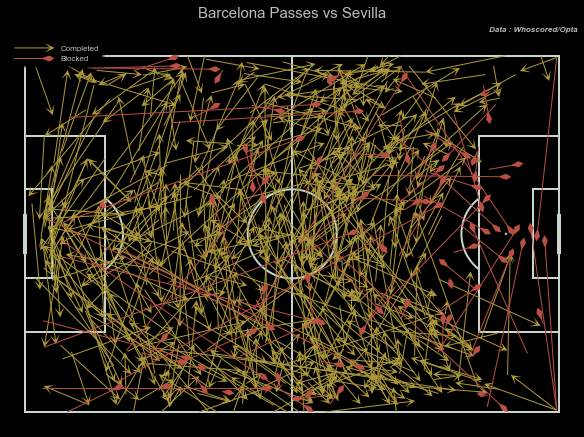

In [4]:
# Team data
team = 'Barcelona'
teamId = 65
opponent = 'Sevilla'
venue = 'home'

visuals.getTeamTotalPasses(events_df, teamId, team, opponent, pitch_color='#000000')

## Successful box passes

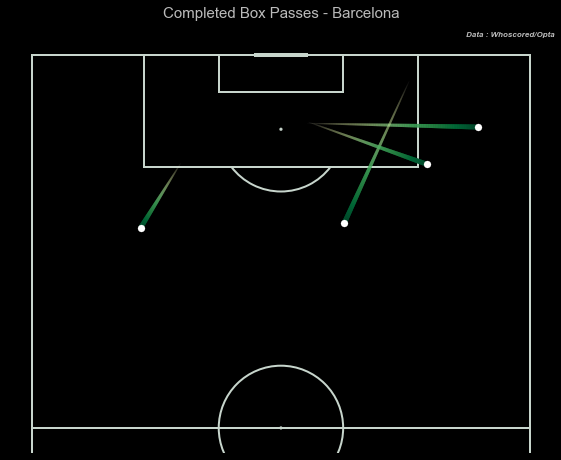

In [5]:
# Team data
team = 'Barcelona'
teamId = 65
opponent = 'Sevilla'
venue = 'home'

# You can select more cmaps here: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
# opp_transparent/opp_comet are manually added by me to this visual, you can change it in visuals.py
# If you get an error regarding 'opp_transparent/opp_comet' you probably haven't replaced pitch.py/linecollection.py file
visuals.getTeamSuccessfulBoxPasses(events_df, teamId, team, pitch_color='#000000', cmap='YlGn')

## All passes network

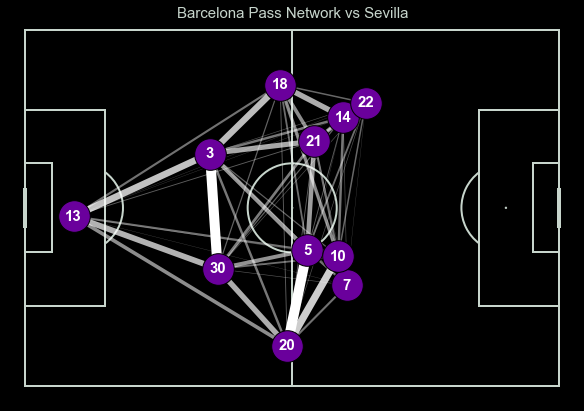

In [6]:
# Team data
team = 'Barcelona'
teamId = 65
opponent = 'Sevilla'
venue = 'home'

# Create Pass Network     
# you can change marker_label to 'name' as well
visuals.createPassNetworks(match_data, matches_df, events_df, team='Barcelona',
                           pitch_color='#000000', max_lw=10, marker_size=1000, 
                           marker_color='#6a009c', marker_label='kit_no', marker_label_size=15) 

## Progressive passes network

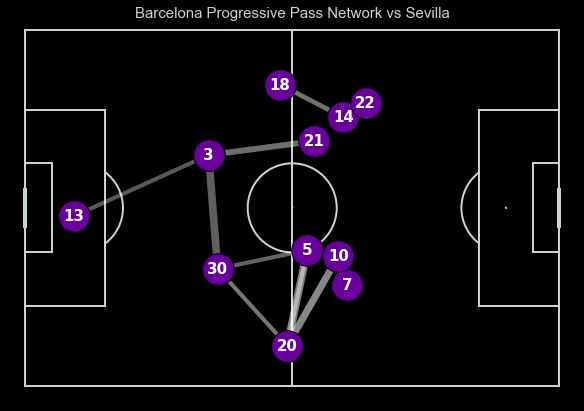

In [7]:
# Team data
team = 'Barcelona'
teamId = 65
opponent = 'Sevilla'
venue = 'home'

# Create Progressive Pass Network
# you can change marker_label to 'name' as well
visuals.createAttPassNetworks(match_data, matches_df, events_df, team='Barcelona', 
                              pitch_color='#000000', max_lw=10, marker_size=1000, 
                              marker_color='#6a009c', marker_label='kit_no', marker_label_size=15)

# Get shotmap

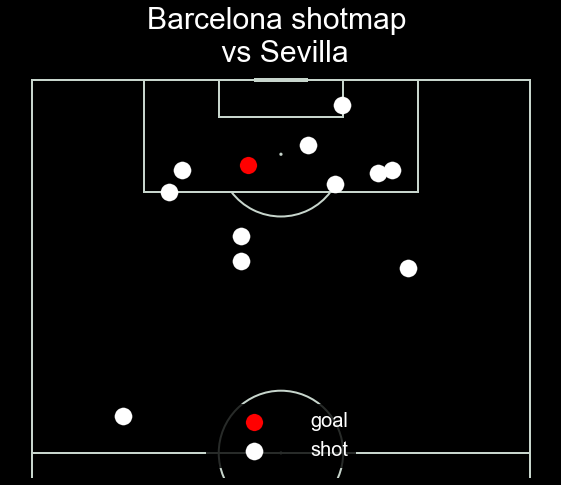

In [8]:
# Team data
team = 'Barcelona'
teamId = 65
opponent = 'Sevilla'
venue = 'home'

visuals.createShotmap(match_data, events_df, team=team, pitchcolor='black', shotcolor='white',
                      goalcolor='red', titlecolor='white', legendcolor='white', marker_size=300)

# Get PV formation map

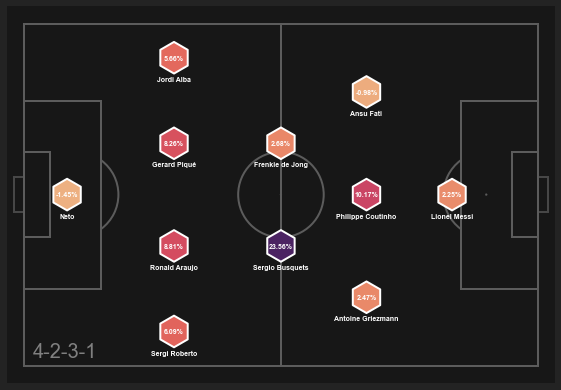

In [9]:
# Team data
team = 'Barcelona'
teamId = 65
opponent = 'Sevilla'
venue = 'home'

# Choose your color palette from here: https://seaborn.pydata.org/tutorial/color_palettes.html
visuals.createPVFormationMap(match_data, events_df, team=team, color_palette=sns.color_palette("flare", as_cmap=True),
                             markerstyle='h', markersize=1000, markeredgewidth=2, labelsize=7, labelcolor='w')